In [ ]:
import mysql.connector
import pandas as pd

# -------------------------------------------
# BLOC 1: CONEXIÓ A LA BASE DE DADES
# -------------------------------------------
try:
    conexion = mysql.connector.connect(
    host='localhost',
    port=3306,
    user='root',
    password='CLAVE',
    database='classicmodels' # POSAR EN NOM DE LA BASE DE DADES!!!!!!!!!!!!!!!!!
)
        
    if conexion.is_connected():
        print("\n¡Conexió exitosa! 🚀")
except mysql.connector.Error as e:
    print(f"\n❌ Error de conexió: {e}")
    # Sortim del script si no hi ha conexió
    exit(1)
# -------------------------------------------
# BLOC 2: CÀRRREGA DE TAULES A DATAFRAMES AUTOMATITZADA
# -------------------------------------------
try:
    # Operació 1: Obtenir llista de taules
    cursor = conexion.cursor() # Crea un cursor per interactuar amb la base de dades
    cursor.execute("SHOW TABLES") # Executa la comanda SQL per llistar les taules
    tablas = [tabla[0] for tabla in cursor.fetchall()]  # Recupera tots els resultats i extrau el primer element de cada tupla (el nom de la taula) a una lista.
    cursor.close()# Tanca el cursor per alliberar recursos
    print(f"\nTaules detectades: {', '.join(tablas)}\n") # Imprimeix les taules detectades formatejades
    

    # Operació 2 : Carregar cada taula a un DataFrame
    for tabla in tablas:    # Itera sobre cada nom de taula obtingut a la Operació 1
        nombre_df = f"{tabla}_df"  # Crea un nom per al DataFrame afegint '_df' al nom de la taula
        df = pd.read_sql(f"SELECT * FROM `{tabla}`", conexion) # Executa una consulta SQL per a obtenir totes les dades de la taula i les  carrega a un DataFrame temporal 'df'
        globals()[nombre_df] = df   # Crea una variable global con el nombre generado que contiene el DataFrame
        print(f"✓ DataFrame '{nombre_df}' generat ({len(df)} registres)") # Confirma la creació mostran els registres carregats
    
except Exception as e:
    print(f"\n❌ Error durant operacions SQL: {e}")

# -------------------------------------------
# BLOC 3: TANCAMENT DE CONEXIÓ
# -------------------------------------------
if conexion.is_connected():
    conexion.close()
    print("\n✅Connexió tancada correctament!!!!!!!!!!!!!!!!!!")


¡Conexió exitosa! 🚀

Taules detectades: customers, employees, offices, orderdetails, orders, payments, productlines, products



C:\Users\PC\AppData\Local\Temp\ipykernel_25832\4221913514.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM `{tabla}`", conexion) # Executa una consulta SQL per a obtenir totes les dades de la taula i les  carrega a un DataFrame temporal 'df'


✓ DataFrame 'customers_df' generat (122 registres)
✓ DataFrame 'employees_df' generat (23 registres)
✓ DataFrame 'offices_df' generat (7 registres)
✓ DataFrame 'orderdetails_df' generat (2996 registres)
✓ DataFrame 'orders_df' generat (326 registres)
✓ DataFrame 'payments_df' generat (273 registres)
✓ DataFrame 'productlines_df' generat (7 registres)
✓ DataFrame 'products_df' generat (110 registres)

✅Connexió tancada correctament!!!!!!!!!!!!!!!!!!


In [2]:
customers_df.shape

(122, 13)

In [3]:
customers_df.head(7)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.0
5,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,None,San Rafael,CA,97562,USA,1165.0,210500.0
6,125,Havel & Zbyszek Co,Piestrzeniewicz,Zbyszek,(26) 642-7555,ul. Filtrowa 68,None,Warszawa,None,01-012,Poland,NaN,0.0


In [4]:
filtrofrance =customers_df['country']=='France'
customer_france_df = customers_df[filtrofrance]
customer_france_df

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
13,146,"Saveley & Henriot, Co.",Saveley,Mary,78.32.5555,"2, rue du Commerce",None,Lyon,None,69004,France,1337.0,123900.0
22,171,Daedalus Designs Imports,Rancé,Martine,20.16.1555,"184, chaussée de Tournai",None,Lille,None,59000,France,1370.0,82900.0
23,172,"La Corne D'abondance, Co.",Bertrand,Marie,(1) 42.34.2555,"265, boulevard Charonne",None,Paris,None,75012,France,1337.0,84300.0
37,209,Mini Caravy,Citeaux,Frédérique,88.60.1555,"24, place Kléber",None,Strasbourg,None,67000,France,1370.0,53800.0
47,242,Alpha Cognac,Roulet,Annette,61.77.6555,1 rue Alsace-Lorraine,None,Toulouse,None,31000,France,1370.0,61100.0
50,250,Lyon Souveniers,Da Silva,Daniel,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,None,Paris,None,75508,France,1337.0,68100.0
51,256,Auto Associés & Cie.,Tonini,Daniel,30.59.8555,"67, avenue de l'Europe",None,Versailles,None,78000,France,1370.0,77900.0
79,350,Marseille Mini Autos,Lebihan,Laurence,91.24.4555,"12, rue des Bouchers",None,Marseille,None,13008,France,1337.0,65000.0


In [5]:
customer_france_df.dtypes

customerNumber              int64
customerName               object
contactLastName            object
contactFirstName           object
phone                      object
addressLine1               object
addressLine2               object
city                       object
state                      object
postalCode                 object
country                    object
salesRepEmployeeNumber    float64
creditLimit               float64
dtype: object

In [6]:
filtro_credito = customer_france_df['creditLimit']> 100000
customer_france_df[filtro_credito]

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
13,146,"Saveley & Henriot, Co.",Saveley,Mary,78.32.5555,"2, rue du Commerce",None,Lyon,None,69004,France,1337.0,123900.0


In [7]:
filtro_francia = customers_df['country'] == 'France'
filtro_credito = customers_df['creditLimit'] > 100000
customers_france_credit_df = customers_df[filtro_francia & filtro_credito]
customers_france_credit_df

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
13,146,"Saveley & Henriot, Co.",Saveley,Mary,78.32.5555,"2, rue du Commerce",None,Lyon,None,69004,France,1337.0,123900.0


In [8]:
#Clientes del 10 al 13 (inclusive). columnas city y state
customers_df.loc[10:13,['city','state']] #Em dona les dades de la 'surname' de la posició 0

,city,state
10,Madrid,None
11,Luleå,None
12,Kobenhavn,None
13,Lyon,None


In [9]:
customers_df

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,486,Motor Mint Distributors Inc.,Salazar,Rosa,2155559857,11328 Douglas Av.,None,Philadelphia,PA,71270,USA,1323.0,72600.0
118,487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,None,Brisbane,CA,94217,USA,1165.0,60300.0
119,489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,None,London,None,WA1 1DP,UK,1501.0,43300.0
120,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,None,Boston,MA,51003,USA,1188.0,85100.0


In [10]:
import pandas as pl #Pandas df's
import matplotlib.pyplot as plt #Gràfics matplotlib
import seaborn as sns #grafics seaborn
import datetime as dt #Per a treballar amb dates
import plotly.express as px #TREEMAP
import plotly.graph_objects as go #Per a SANKEY

Variable categorica

<Axes: xlabel='count', ylabel='country'>

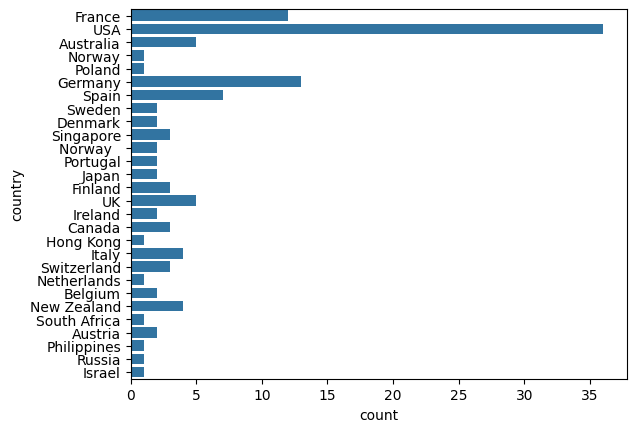

In [11]:
sns.countplot(data=customers_df, y='country')

1 Variable numèrica

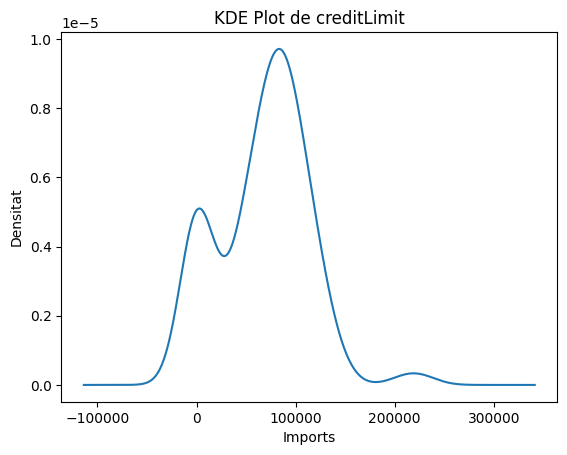

In [12]:
# KDE pandas
customers_df['creditLimit'].plot.kde()
plt.title('KDE Plot de creditLimit')
plt.xlabel('Imports')
plt.ylabel('Densitat')
plt.show()

1 Variable Numèrica

In [13]:
# KDE pandas
customers_SFG_df['creditLimit'].plot.kde()
plt.title('KDE Plot de creditLimit')
plt.xlabel('Imports')
plt.ylabel('Densitat')
plt.show()

NameError: name 'customers_SFG_df' is not defined

<Axes: >

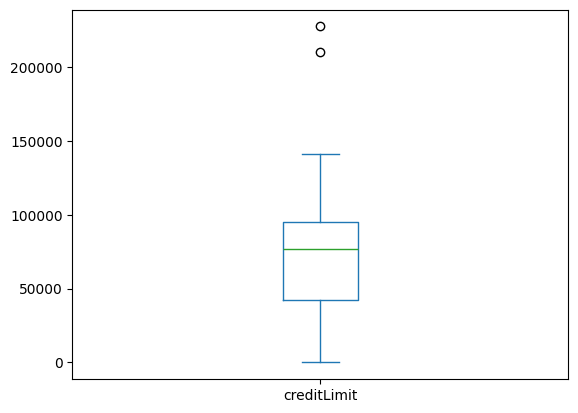

In [ ]:
#Boxplot pandas
customers_df['creditLimit'].plot.box()

In [ ]:
#df con clientes de españa, francia y alemania
filtroSpain = customers_df['country']=='Spain'
filtroFrance = customers_df['country']=='France'
filtroGermany = customers_df['country']=='Germany'
customers_SFG_df = customers_df[filtroSpain | filtroFrance | filtroGermany]
customers_SFG_df.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
7,128,"Blauer See Auto, Co.",Keitel,Roland,+49 69 66 90 2555,Lyonerstr. 34,None,Frankfurt,None,60528,Germany,1504.0,59700.0
10,141,Euro+ Shopping Channel,Freyre,Diego,(91) 555 94 44,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,1370.0,227600.0
13,146,"Saveley & Henriot, Co.",Saveley,Mary,78.32.5555,"2, rue du Commerce",None,Lyon,None,69004,France,1337.0,123900.0


1 Variable Numèrica 

<Axes: xlabel='creditLimit', ylabel='Density'>

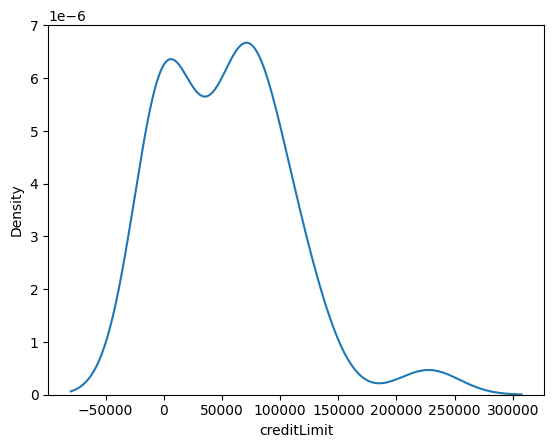

In [ ]:
#KDE
sns.kdeplot(
    data=customers_SFG_df,
    x="creditLimit",      # Variable numérica
    #hue="country",          # Variable categórica
)

1 Variable Numèrica  + Categòrica de Seaborn

<Axes: xlabel='creditLimit', ylabel='Density'>

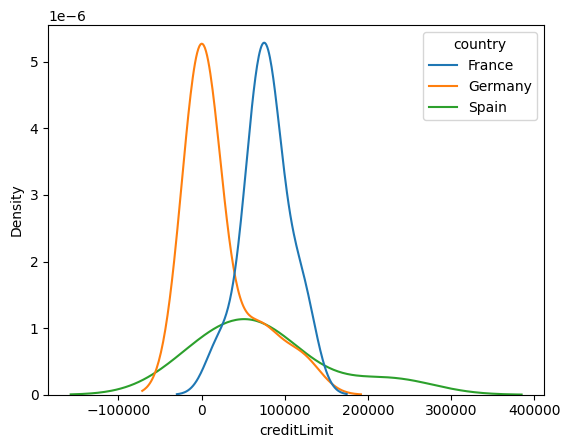

In [ ]:
#KDE
sns.kdeplot(
    data=customers_SFG_df,
    x="creditLimit",      # Variable numérica
    hue="country",          # Variable categórica
)

In [ ]:
orderdetails_df.tail(10)

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
2986,10425,S18_2319,38,117.82,7
2987,10425,S18_2432,19,48.62,10
2988,10425,S18_3232,28,140.55,8
2989,10425,S18_4600,38,107.76,13
2990,10425,S24_1444,55,53.75,1
2991,10425,S24_2300,49,127.79,9
2992,10425,S24_2840,31,31.82,5
2993,10425,S32_1268,41,83.79,11
2994,10425,S32_2509,11,50.32,6
2995,10425,S50_1392,18,94.92,2


In [ ]:
products_df.tail(5)

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
105,S700_3505,The Titanic,Ships,1:700,Carousel DieCast Legends,"Completed model measures 19 1/2 inches long, 9...",1956,51.09,100.17
106,S700_3962,The Queen Mary,Ships,1:700,Welly Diecast Productions,Exact replica. Wood and Metal. Many extras inc...,5088,53.63,99.31
107,S700_4002,American Airlines: MD-11S,Planes,1:700,Second Gear Diecast,Polished finish. Exact replia with official lo...,8820,36.27,74.03
108,S72_1253,Boeing X-32A JSF,Planes,1:72,Motor City Art Classics,"10"" Wingspan with retractable landing gears.Co...",4857,32.77,49.66
109,S72_3212,Pont Yacht,Ships,1:72,Unimax Art Galleries,Measures 38 inches Long x 33 3/4 inches High. ...,414,33.30,54.60


In [ ]:
# 1 df codigo producto , nombre, precio compra, precio venta, diferencia compra y venta.
# 2 df promedio beneficio segun 	productLine, y cuantos 	productLine hay?


In [ ]:
# de orderdetails, creo un nuevo df con productCode y el promedio de Price Each
orderdetails_df2 =orderdetails_df.groupby(['productCode'])['priceEach'].mean().round(2).reset_index(name='promedio_priceEach')
orderdetails_df2.head(10)

,productCode,promedio_priceEach
0,S10_1678,85.17
1,S10_1949,197.31
2,S10_2016,110.02
3,S10_4698,172.29
4,S10_4757,124.25
5,S10_4962,131.81
6,S12_1099,172.45
7,S12_1108,187.10
8,S12_1666,123.34
9,S12_2823,132.17


In [ ]:
#per agrupar per més de 1 categoria
# counts = merged_df.groupby(['country', 'declined']).size().reset_index(name='count')

In [ ]:
merged_df = orderdetails_df2.merge(
    products_df, 
    left_on='productCode', 
    right_on='productCode', 
    how='inner'
)
merged_df.head(5)

,productCode,promedio_priceEach,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,85.17,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,197.31,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,110.02,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,172.29,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,124.25,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00


In [ ]:
# 1 df codigo producto , nombre, precio compra, categoria, priceEach, MSRP, diferencia compra y priceEach.
merged_df['diferencia']=merged_df['promedio_priceEach']-merged_df['buyPrice']
merged_df[['productCode','productName','productLine','buyPrice','promedio_priceEach','diferencia','MSRP']]

,productCode,productName,productLine,buyPrice,promedio_priceEach,diferencia,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,48.81,85.17,36.36,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,98.58,197.31,98.73,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,68.99,110.02,41.03,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,91.02,172.29,81.27,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,85.68,124.25,38.57,136.00
...,...,...,...,...,...,...,...
104,S700_3505,The Titanic,Ships,51.09,89.52,38.43,100.17
105,S700_3962,The Queen Mary,Ships,53.63,88.20,34.57,99.31
106,S700_4002,American Airlines: MD-11S,Planes,36.27,65.97,29.70,74.03
107,S72_1253,Boeing X-32A JSF,Planes,32.77,44.43,11.66,49.66


In [ ]:
# 2 df promedio beneficio segun 	productLine, y cuantos 	productLine hay?
merged_df3 =merged_df.groupby(['productLine'])['diferencia'].mean().round(2).reset_index(name='promedio_diferencia_categoria')
merged_df3

,productLine,promedio_diferencia_categoria
0,Classic Cars,41.79
1,Motorcycles,36.32
2,Planes,30.70
3,Ships,30.73
4,Trains,23.22
5,Trucks and Buses,36.38
6,Vintage Cars,32.42


2 variables numèriques

<Axes: xlabel='buyPrice', ylabel='MSRP'>

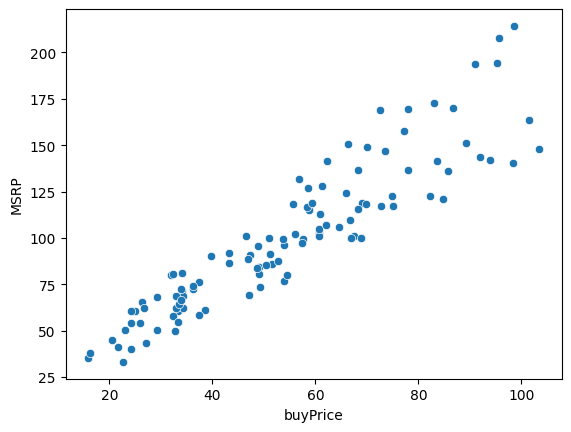

In [ ]:
sns.scatterplot(data = merged_df, y='MSRP', x='buyPrice')


2 variables numèriques i 1 categòrica

<Axes: xlabel='buyPrice', ylabel='MSRP'>

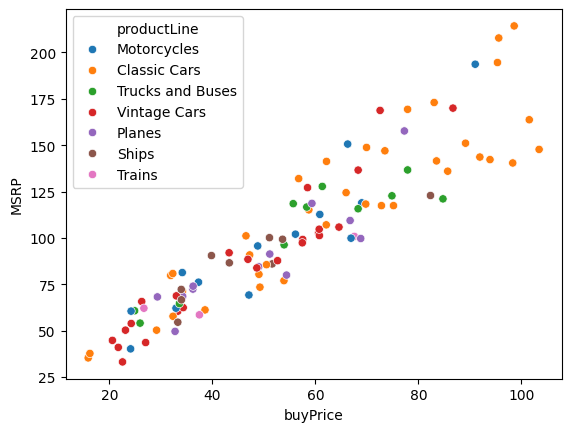

In [ ]:
sns.scatterplot(data = merged_df, y='MSRP', x='buyPrice',hue='productLine')

2 categòriques i 1 numèrica

c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\PC\AppData\

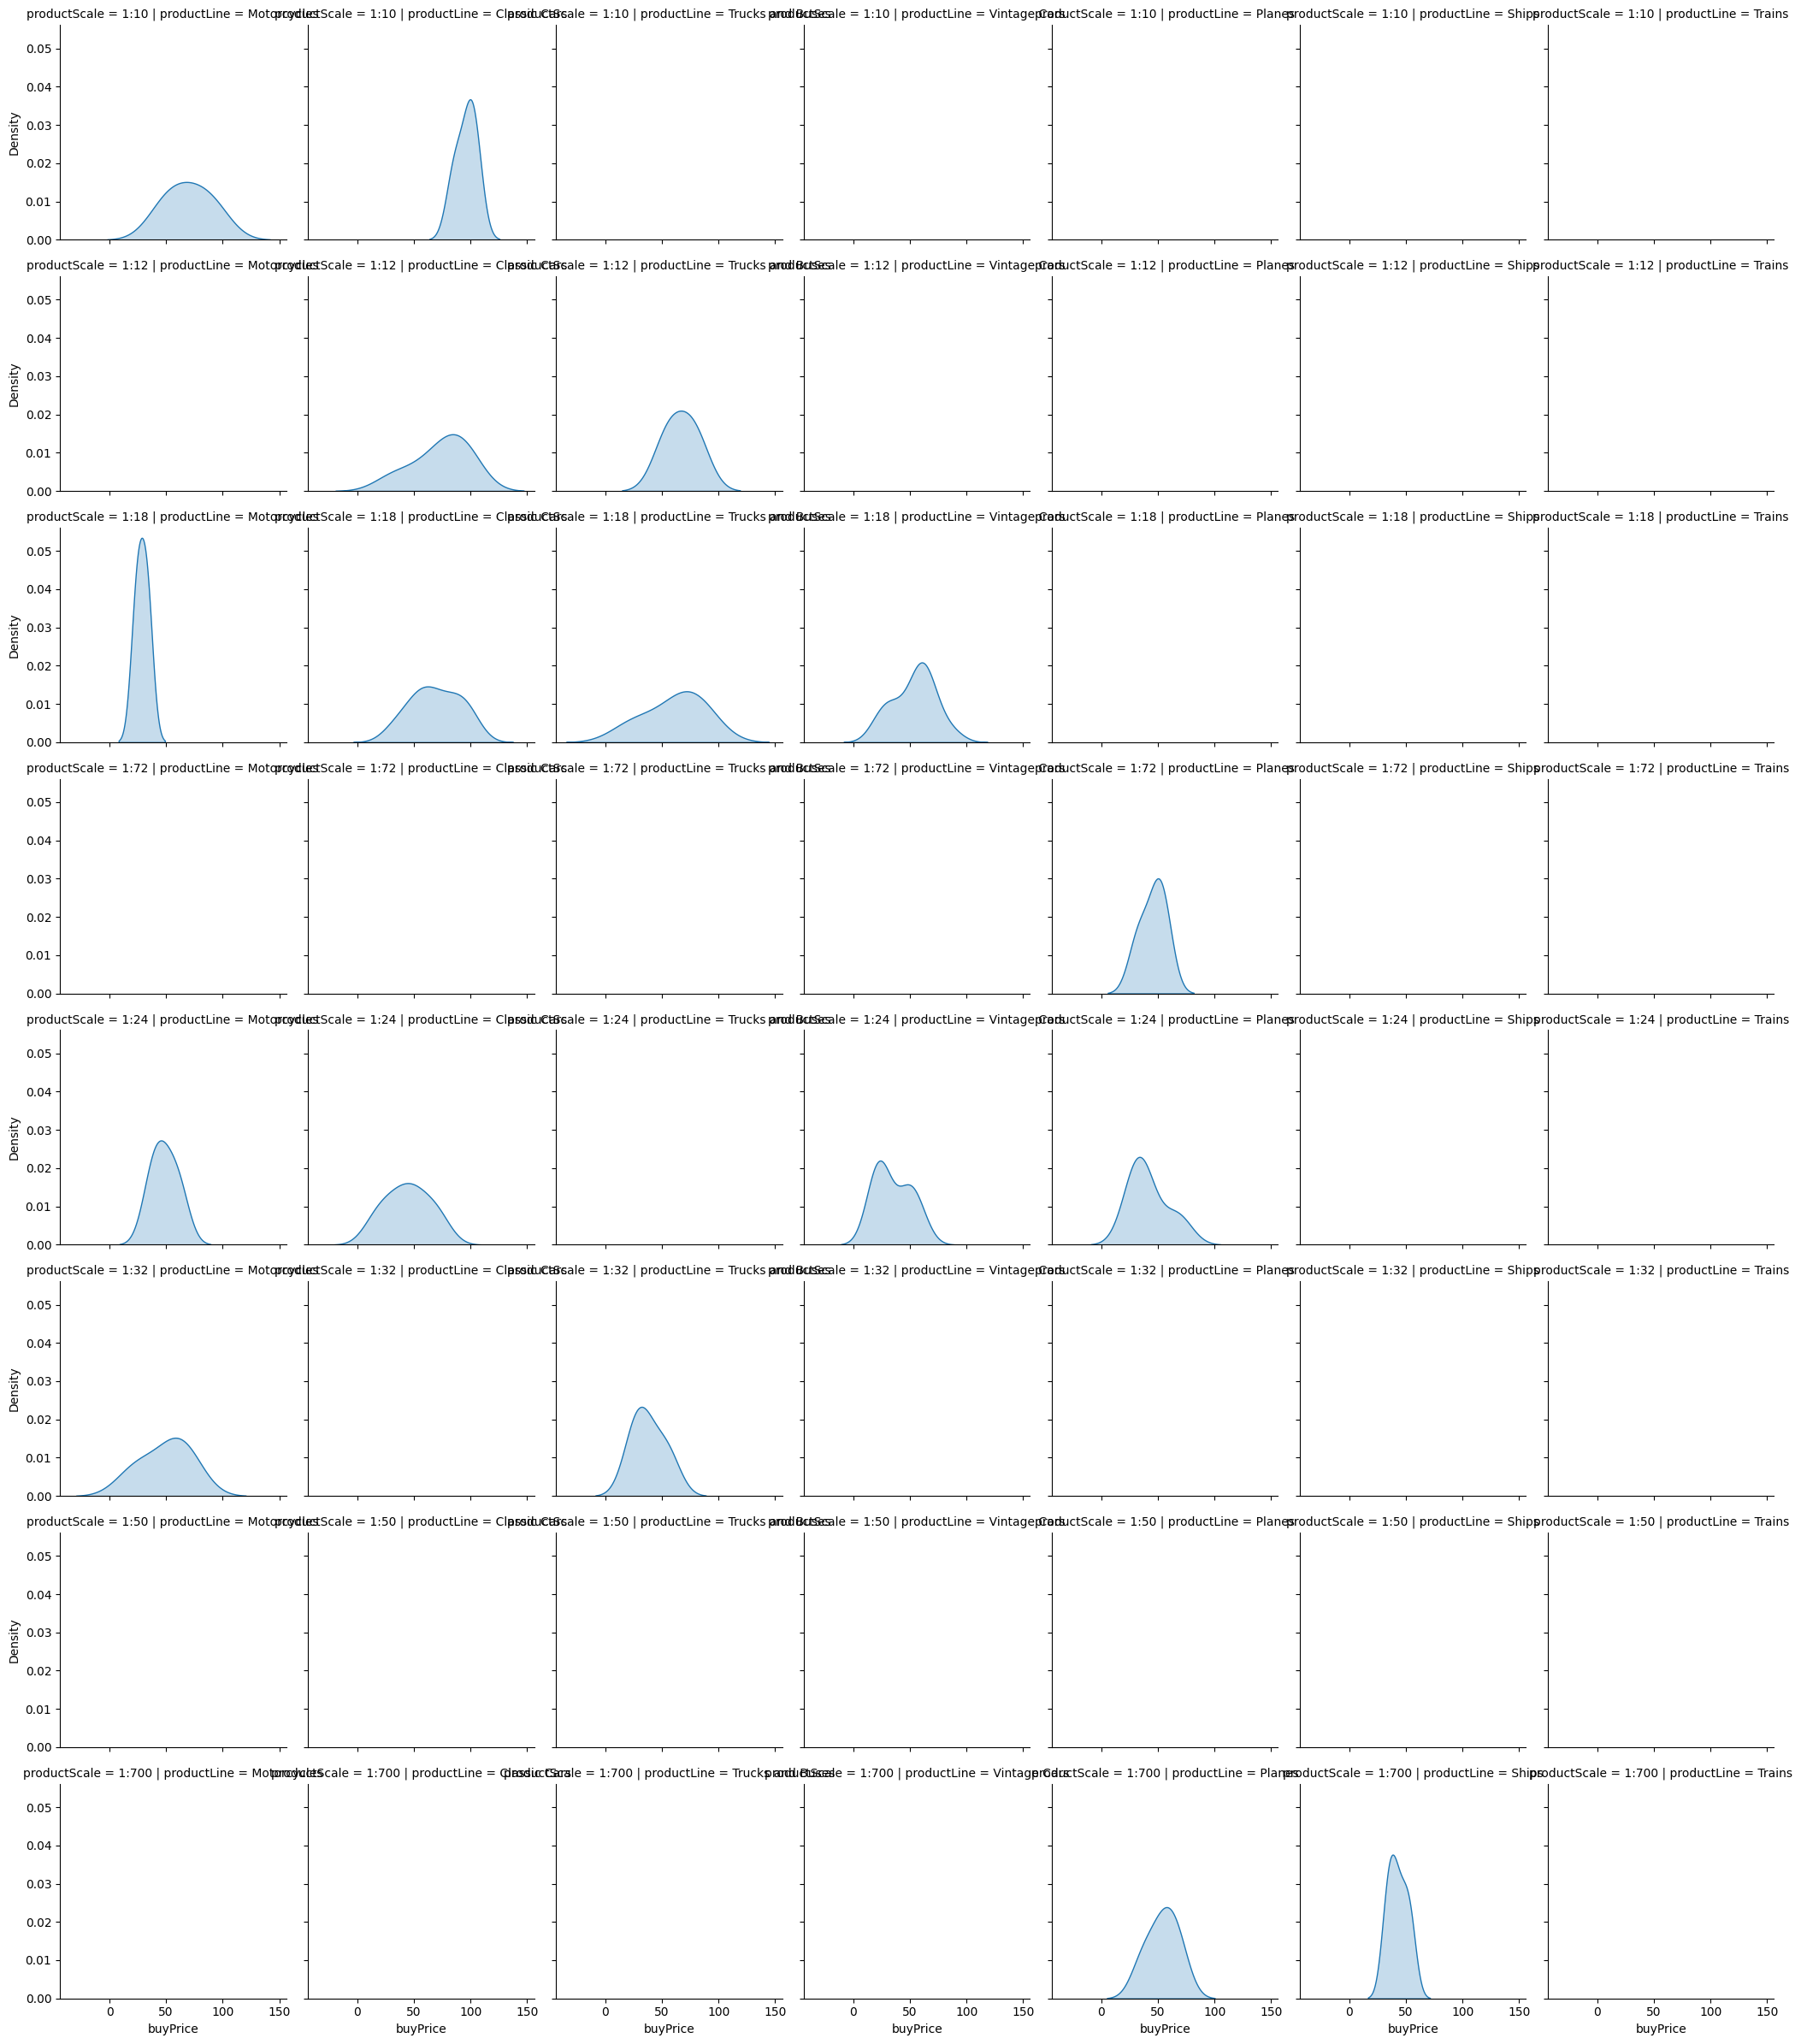

In [14]:

grafico = sns.FacetGrid(products_df, col='productLine',row='productScale')
grafico.map_dataframe(sns.kdeplot, x='buyPrice', fill=True)

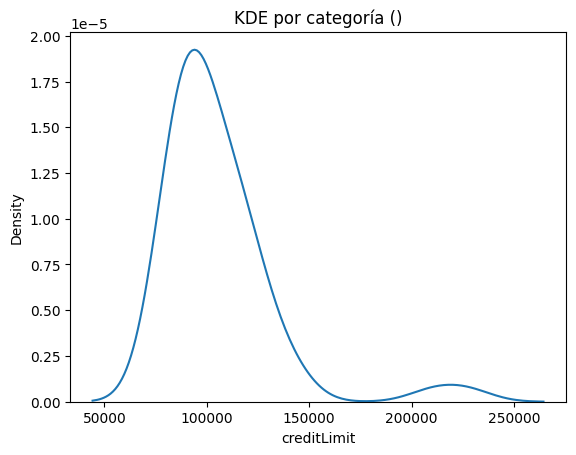

In [15]:
filtro_credito = customers_df['creditLimit'] > 80000

sns.kdeplot(
    data=customers_df[filtro_credito],
    x="creditLimit",      # Variable numérica
)

plt.title("KDE por categoría ()")
plt.show()